## Proyecto individual 2, Machine Lerning - Leonardo Cueto 

Descarga de librerías necesarias para el trabajo 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from pathlib import Path 
from os import replace
import joblib 
from sklearn import tree
from sklearn import svm

In [18]:
dataTrain = pd.read_csv('https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_train.csv')
dataTest = pd.read_csv('https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_test.csv')

Comienzo dando un vistazo a los datos para ver la manera en que los abordaré

In [19]:
dataTrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [20]:
dataTest.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


Despés de haber visto los DataFrames, considero que la mejor manera de generar la predicción es a través de un **random forest**.

Comienzo normalizando algunos titulos y datos de ambas tablas

In [21]:
dataTrain.rename(columns = {'Type of Admission': 'TypesOfAdmission',
                            'Severity of Illness': 'Severity',
                            'Visitors with Patient': 'VisitorisWithPatient',
                            'Available Extra Rooms in Hospital':'AvailableRooms',
                            'Stay (in days)': 'Stay',
                            'patientid':'PatientId',
                            'Admission_Deposit': 'AdmissionDeposit'}, inplace = True)
dataTest.rename(columns = {'Type of Admission': 'TypesOfAdmission',
                            'Severity of Illness': 'Severity',
                            'Visitors with Patient': 'VisitorisWithPatient',
                            'Available Extra Rooms in Hospital':'AvailableRooms',
                            'Stay (in days)': 'Stay',
                            'patientid':'PatientId',
                            'Admission_Deposit': 'AdmissionDeposit'}, inplace = True)
dataTrain['AdmissionDeposit'] = round((pd.to_numeric(dataTrain['AdmissionDeposit'])),2)
dataTrain['PatientId'] = pd.to_numeric(dataTrain['PatientId'])
dataTrain['Stay'] = pd.to_numeric(dataTrain['Stay'])

Para abordar este problema, al ser de clasificación, creo que la mejor opción es usar un Random Forest, ya que nos permite tener distintos arboles para poder tomar la decisión final. 

Para esto, todos los datos de la tabla deben que ser valores numéricos, por lo que se tiene que hacer el siguiente cambio:

In [22]:
le = preprocessing.LabelEncoder()
dataTrain['NewAge'] = le.fit_transform(dataTrain.Age.values)
dataTest['NewAge'] = le.fit_transform(dataTest.Age.values)
dataTrain['NewDepartment'] = le.fit_transform(dataTrain.Department.values)
dataTest['NewDepartment'] = le.fit_transform(dataTest.Department.values)
dataTrain['NewWardFacilityCode'] = le.fit_transform(dataTrain.Ward_Facility_Code.values)
dataTest['NewWardFacilityCode'] = le.fit_transform(dataTest.Ward_Facility_Code.values)
dataTrain['NewGender'] = le.fit_transform(dataTrain.gender.values)
dataTest['NewGender'] = le.fit_transform(dataTest.gender.values)
dataTrain['NewTypeOfAdmission'] = le.fit_transform(dataTrain.TypesOfAdmission.values)
dataTest['NewTypeOfAdmission'] = le.fit_transform(dataTest.TypesOfAdmission.values)
dataTrain['NewSeverity'] = le.fit_transform(dataTrain.Severity.values)
dataTest['NewSeverity'] = le.fit_transform(dataTest.Severity.values)
dataTrain['NewHealthConditions'] = le.fit_transform(dataTrain.health_conditions.values)
dataTest['NewHealthConditions'] = le.fit_transform(dataTest.health_conditions.values)
dataTrain['NewInsurance'] = le.fit_transform(dataTrain.Insurance.values)
dataTest['NewInsurance'] = le.fit_transform(dataTest.Insurance.values)
dataTrain['NewDoctorName'] = le.fit_transform(dataTrain.doctor_name.values)
dataTest['NewDoctorName'] = le.fit_transform(dataTest.doctor_name.values)

In [ ]:
dataTest.head(5)

,AvailableRooms,Department,Ward_Facility_Code,doctor_name,staff_available,PatientId,Age,gender,TypesOfAdmission,Severity,...,AdmissionDeposit,NewAge,NewDepartment,NewWardFacilityCode,NewGender,NewTypeOfAdmission,NewSeverity,NewHealthConditions,NewInsurance,NewDoctorName
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,...,4749.640225,2,2,5,0,1,2,5,0,4
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,...,4122.261324,5,0,4,0,1,2,0,1,1
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,...,5459.067882,5,3,4,2,1,2,4,0,1
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,...,3987.033318,2,2,5,0,1,2,4,1,4
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,...,4770.789695,5,1,0,0,1,0,1,0,1


In [ ]:
dataTrain.head()

,AvailableRooms,Department,Ward_Facility_Code,doctor_name,staff_available,PatientId,Age,gender,TypesOfAdmission,Severity,...,Stay,NewAge,NewDepartment,NewWardFacilityCode,NewGender,NewTypeOfAdmission,NewSeverity,NewHealthConditions,NewInsurance,NewDoctorName
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,8,4,2,3,0,1,0,1,1,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,9,3,2,1,0,1,1,2,0,8
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,7,2,2,1,0,1,0,1,1,8
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,8,3,2,3,0,2,2,4,0,4
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,34,7,1,4,1,1,2,1,0,2


Decido **eliminar** las siguientes filas ya que no las considero **tan importantes** para el modelo propuesto:

'AvailableRooms','staff_available','VisitorisWithPatient','PatientId'

In [23]:
texto = ['doctor_name','Department','Ward_Facility_Code','Age','Severity','health_conditions','Insurance','gender','TypesOfAdmission','AvailableRooms','staff_available','VisitorisWithPatient','PatientId']
for numero,columna in enumerate(texto):
            if columna in dataTrain.columns:
                dataTrain.drop(labels = texto, axis  =1, inplace = True)
                dataTest.drop(labels = texto, axis  =1, inplace = True)
            else: pass

Aquí, a través de una serie de 'for' cambiamos los datos de la columna 'AdmissionDeposit' para que nos de un 0 si está por debajo de 4700 o 1 si está por encima, y en el DF dataTrainCopy, también aplicamos lo mismo para la columna 'Stay', pero con el límite <=8 días

In [ ]:
dataTrainCopy = dataTrain.copy()
for numero,fila in enumerate(dataTrain.AdmissionDeposit):
  if fila <= 4700:
    dataTrainCopy.AdmissionDeposit[numero] = 0
  elif fila > 4700:
    dataTrainCopy.AdmissionDeposit[numero] = 1
  else: 
    dataTrainCopy.AdmissionDeposit[numero] = NaN
for numero,fila in enumerate(dataTrain.Stay):
  if fila <= 8:
    dataTrainCopy.Stay[numero] = 0
  elif fila > 8:
    dataTrainCopy.Stay[numero] = 1
  else: 
    dataTrainCopy.Stay[numero] = NaN

dataTestCopy = dataTest.copy()
for numero,fila in enumerate(dataTest.AdmissionDeposit):
  if fila <= 4700:
    dataTestCopy.AdmissionDeposit[numero] = 0
  elif fila > 4700:
    dataTestCopy.AdmissionDeposit[numero] = 1
  else: 
    dataTestCopy.AdmissionDeposit[numero] = NaN

In [11]:
dataTestCopy.head(5)

NameError: ignored

In [ ]:
dataTrainCopy.head(5)

,AvailableRooms,staff_available,AdmissionDeposit,Stay,NewAge,NewDepartment,NewGender,NewTypeOfAdmission,NewSeverity,NewHealthConditions,NewInsurance,NewDoctorName,NewStaffAvailable,NewAvailableRooms
0,4,0,0.0,0,4,2,0,1,0,1,1,8,0,4
1,4,2,0.0,1,3,2,0,1,1,2,0,8,2,4
2,2,8,1.0,0,2,2,0,1,0,1,1,8,8,2
3,4,7,1.0,0,3,2,0,2,2,4,0,4,7,4
4,2,10,1.0,1,7,1,1,1,2,1,0,2,10,2


El proceso que lleva la máquina para hacer el cambio es algo tardado, por lo que decido mandar estos DF finales a un csv y poder tener una copia guardada para las pruebas que sigo haciendo

In [22]:
dataTestCopy.to_csv('DataTestF.csv',index = False)
dataTrainCopy.to_csv('DataTrainF.csv', index = False)

In [6]:
dataTrainCopy = pd.read_csv('DataTrainF.csv')
dataTestCopy = pd.read_csv('DataTestF.csv')

Se genera a 'x' e 'y' para empezar a crear nuestro modelo de Random Forest 

In [7]:
x = dataTrainCopy.drop(['Stay'], axis = 1)
y = dataTrainCopy.Stay


separación de los datos entre entrenamiento y testeo

In [8]:
XTrain, XTest, YTrain, YTest = train_test_split(x,y,random_state = 0)

Creacón y entrenamiento del modelo RF

In [15]:
rfModel = RandomForestClassifier(n_estimators = 19, random_state=2016, min_samples_leaf = 8)
rfModel.fit(XTrain, YTrain)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=2016)

Creación de la matriz de confusión en base a los resultados aplicados a XTest

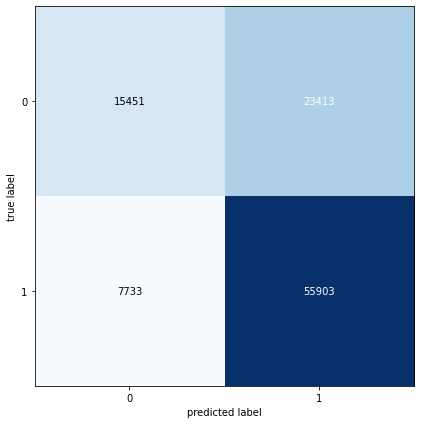

In [16]:
yPred = rfModel.predict(XTest)
matriz = confusion_matrix(YTest,yPred)
plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed = False)
plt.tight_layout()

Finalmente el accuracy y recall obtenidos son: 

In [17]:
ac = accuracy_score(YTest,yPred)
re = recall_score(YTest,yPred)
print('El accuracy obtenido es: %.2f'%ac,'\nEl recall obtenido es: %.2f'%re)

El accuracy obtenido es: 0.70 
El recall obtenido es: 0.88


Aplico el modelo creado en nuestro DataFrame de testeo 'DataTest' para generar las predicciones solicitadas

In [18]:
dataTest['Pred'] = rfModel.predict(dataTestCopy)
dataTest.head(5)

NameError: ignored

Genero csv con valores predichos 

In [30]:
finalDF = dataTest['Pred']
finalDF.to_csv('Leonardo1278.csv', index = False)

Creación de pipeline

In [12]:
pipeRF = Pipeline([('scl',StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('cfl', RandomForestClassifier(random_state=42))])


In [20]:
pipeSVM = Pipeline([('scl',StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('cfl', svm.SVC(random_state=42))])

In [3]:
pipeTree = Pipeline([('scl',StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('cfl', tree.DecisionTreeClassifier(random_state=42))])

In [14]:
pipeLines = [pipeRF,pipeTree]
pipeDict = {0:'Random Forest',
            1:'Decision Tree'}

Entrenamiento del pipeline

In [15]:
for pipe in pipeLines:
  pipe.fit(XTrain,YTrain)
print('Pipeline entrenado exitosamente')

Pipeline entrenado exitosamente


In [16]:
for i, val in enumerate(pipeLines):
  print('Para %s el accuracy score es %.2f'%(pipeDict[i],val.score(XTest, YTest)))

Para Random Forest el accuracy score es 0.69
Para Decision Tree el accuracy score es 0.69


Aplico el pipeline a mi set de testeo para verificar que las predicciones sean las mismas en ambas columnas

In [24]:
dataTest['PredPipeLine'] = pipeRF.predict(dataTestCopy)
dataTest['PredDecTreee'] = pipeTree.predict(dataTestCopy)
dataTest.head(5)

,AdmissionDeposit,NewAge,NewDepartment,NewWardFacilityCode,NewGender,NewTypeOfAdmission,NewSeverity,NewHealthConditions,NewInsurance,NewDoctorName,PredPipeLine,PredDecTreee
0,4749.640225,2,2,5,0,1,2,5,0,4,0,0
1,4122.261324,5,0,4,0,1,2,0,1,1,1,0
2,5459.067882,5,3,4,2,1,2,4,0,1,1,1
3,3987.033318,2,2,5,0,1,2,4,1,4,1,1
4,4770.789695,5,1,0,0,1,0,1,0,1,1,1


In [42]:
joblib.dump(pipeRF, 'PipelineRF.pkl', compress =1)
print('Modelo guardado exitosamente')

Modelo guardado exitosamente


In [25]:
joblib.dump(pipeTree, 'PipelineTree.pkl', compress =1)
print('Modelo guardado exitosamente')

Modelo guardado exitosamente
